<h3> To see if prosperity is linked to corruption, I will build a simple linear regression with GDP per capita as the outcome variable and the Corruption Perception Index (CPI) as the explanatory variable. </h3>
<p> <a href="https://www.transparency.org/en/cpi/2020/index/nzl">CPI source</a>

<a href="https://data.oecd.org/gdp/gross-domestic-product-gdp.htm"> GDP per capita source</p>

In [1]:
import requests 
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
## uploaded CSV files into local colab files

# Cleaning corruption dataset

In [3]:
## create corruption index df
corruption = pd.read_csv('corruption_Index.csv')
print(corruption)


    Corruption Perceptions Index 2020: Score timeseries since 2012  ...          Unnamed: 33
0                                                  NaN              ...                  NaN
1                                              Country              ...  Standard error 2012
2                                              Denmark              ...                    2
3                                          New Zealand              ...                  2.2
4                                              Finland              ...                    3
..                                                 ...              ...                  ...
177                                          Venezuela              ...                  2.1
178                                              Yemen              ...                  2.2
179                                              Syria              ...                  2.7
180                                            Somalia              ..

In [4]:
## rename relevant columns
corruption.head()
corruption.rename(columns={"Corruption Perceptions Index 2020: Score timeseries since 2012":"Country","Unnamed: 1": "Country code", "Unnamed: 3": "CPI score 2020"}, inplace=True)

In [5]:
corruption.head()

,Country,Country code,Unnamed: 2,CPI score 2020,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,Standard error 2019,CPI score 2018,Rank 2018,Sources 2018,Standard error 2018,CPI score 2017,Rank 2017,Sources 2017,Standard error 2017,CPI score 2016,Sources 2016,Standard error 2016,CPI score 2015,Sources 2015,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
2,Denmark,DNK,WE/EU,88,1,8,1.78,87,1,8,2.54,88,1,8,2.63,88,2,8,2.75,90,7,2.46,91,7,2.16,92,7,2.04,91,7,2.2,90,7,2
3,New Zealand,NZL,AP,88,1,8,1.48,87,1,8,2.29,87,2,8,2.44,89,1,8,2.4,90,7,2.56,91,7,2.32,91,7,2.28,91,7,2.3,90,7,2.2
4,Finland,FIN,WE/EU,85,3,8,1.75,86,3,8,2.92,85,3,8,2.74,85,3,8,2.84,89,7,1.46,90,7,1.77,89,7,2.05,89,7,1.7,90,7,3


In [6]:
## new df with only relevant columns
corruption2 = corruption[['Country','Country code','CPI score 2020']]
corruption2

,Country,Country code,CPI score 2020
0,NaN,NaN,NaN
1,Country,ISO3,CPI score 2020
2,Denmark,DNK,88
3,New Zealand,NZL,88
4,Finland,FIN,85
...,...,...,...
177,Venezuela,VEN,15
178,Yemen,YEM,15
179,Syria,SYR,14
180,Somalia,SOM,12


In [7]:
## drop the first irrelevant 2 rows leftover from original csv formatting
corruption2 = corruption2.iloc[1: , :]
corruption2

,Country,Country code,CPI score 2020
1,Country,ISO3,CPI score 2020
2,Denmark,DNK,88
3,New Zealand,NZL,88
4,Finland,FIN,85
5,Singapore,SGP,85
...,...,...,...
177,Venezuela,VEN,15
178,Yemen,YEM,15
179,Syria,SYR,14
180,Somalia,SOM,12


In [8]:
## reset index
corruption2.reset_index(inplace=True)

In [9]:
## drop old index
corruption2.drop(columns=['index'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
## renaming columns for merging
corruption2.rename(columns={"Country": "Country name", "Country code": "Country"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
corruption2

,Country name,Country,CPI score 2020
0,Country,ISO3,CPI score 2020
1,Denmark,DNK,88
2,New Zealand,NZL,88
3,Finland,FIN,85
4,Singapore,SGP,85
...,...,...,...
176,Venezuela,VEN,15
177,Yemen,YEM,15
178,Syria,SYR,14
179,Somalia,SOM,12


# Cleaning GDP per capita dataset

In [12]:
## create GDP per capita df
gdp_percap = pd.read_csv ('GDP_perCapita.csv')
print(gdp_percap)

       LOCATION INDICATOR SUBJECT  ...  TIME        Value  Flag Codes
0           AUS       GDP     TOT  ...  1960  25073.26000         NaN
1           AUS       GDP     TOT  ...  1961  25364.88100         NaN
2           AUS       GDP     TOT  ...  1962  27955.35700         NaN
3           AUS       GDP     TOT  ...  1963  30432.97900         NaN
4           AUS       GDP     TOT  ...  1964  32745.28900         NaN
...         ...       ...     ...  ...   ...          ...         ...
4825  EU27_2020       GDP     TOT  ...  2016  39222.74144         NaN
4826  EU27_2020       GDP     TOT  ...  2017  40792.34759         NaN
4827  EU27_2020       GDP     TOT  ...  2018  42138.41971         NaN
4828  EU27_2020       GDP     TOT  ...  2019  43554.20279         NaN
4829  EU27_2020       GDP     TOT  ...  2020  41584.42411         NaN

[4830 rows x 8 columns]


In [13]:
gdp_percap.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,MLN_USD,A,1960,25073.260,NaN
1,AUS,GDP,TOT,MLN_USD,A,1961,25364.881,NaN
2,AUS,GDP,TOT,MLN_USD,A,1962,27955.357,NaN
3,AUS,GDP,TOT,MLN_USD,A,1963,30432.979,NaN
4,AUS,GDP,TOT,MLN_USD,A,1964,32745.289,NaN


In [14]:
## renaming relevant columns
gdp_percap.rename(columns={"LOCATION":"Country","TIME": "Year", "Value": "GDP per capita"}, inplace=True)

In [15]:
## excluding irrelevant columns
gdp_percap_filtered= gdp_percap[gdp_percap['MEASURE'] == 'USD_CAP']
gdp_percap_filtered2= gdp_percap_filtered[gdp_percap_filtered['Year'] == 2020]

In [16]:
gdp_percap_filtered2

,Country,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Year,GDP per capita,Flag Codes
121,AUS,GDP,TOT,USD_CAP,A,2020,54654.22634,NaN
223,AUT,GDP,TOT,USD_CAP,A,2020,55651.10621,NaN
325,BEL,GDP,TOT,USD_CAP,A,2020,52781.88005,P
436,CAN,GDP,TOT,USD_CAP,A,2020,48090.98651,NaN
498,CZE,GDP,TOT,USD_CAP,A,2020,42044.23840,NaN
608,DNK,GDP,TOT,USD_CAP,A,2020,60566.22561,NaN
710,FIN,GDP,TOT,USD_CAP,A,2020,50810.73080,NaN
832,FRA,GDP,TOT,USD_CAP,A,2020,46421.73184,P
934,DEU,GDP,TOT,USD_CAP,A,2020,54315.54634,P
1046,GRC,GDP,TOT,USD_CAP,A,2020,28369.40387,P


In [17]:
## new df with only relevant rows
gdp_percap2 = gdp_percap_filtered2[['Country','Year','GDP per capita']]

In [18]:
gdp_percap2

,Country,Year,GDP per capita
121,AUS,2020,54654.22634
223,AUT,2020,55651.10621
325,BEL,2020,52781.88005
436,CAN,2020,48090.98651
498,CZE,2020,42044.23840
608,DNK,2020,60566.22561
710,FIN,2020,50810.73080
832,FRA,2020,46421.73184
934,DEU,2020,54315.54634
1046,GRC,2020,28369.40387


In [19]:
## reset index
gdp_percap2.reset_index(inplace=True)

In [20]:
gdp_percap2.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
gdp_percap2

,Country,Year,GDP per capita
0,AUS,2020,54654.22634
1,AUT,2020,55651.10621
2,BEL,2020,52781.88005
3,CAN,2020,48090.98651
4,CZE,2020,42044.23840
5,DNK,2020,60566.22561
6,FIN,2020,50810.73080
7,FRA,2020,46421.73184
8,DEU,2020,54315.54634
9,GRC,2020,28369.40387


# Merging datasets

In [22]:
## merge corruption2 and gdp_percap2
merged_data= pd.merge(
    corruption2,
    gdp_percap2,
    how="inner",
    on='Country',
    left_on=None,
    right_on=None,
    left_index=True,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate="one_to_one",
)

In [23]:
merged_data

,Country name,Country,CPI score 2020,Year,GDP per capita
0,Australia,AUS,77,2020,54654.22634
1,Austria,AUT,76,2020,55651.10621
2,Belgium,BEL,76,2020,52781.88005
44,Bulgaria,BGR,44,2020,24626.05945
3,Canada,CAN,77,2020,48090.98651
26,Switzerland,CHE,85,2020,71705.42920
30,Chile,CHL,67,2020,24647.63046
31,Colombia,COL,39,2020,14999.32554
43,Costa Rica,CRI,57,2020,21043.57530
46,Cyprus,CYP,57,2020,39857.61993


In [24]:
## resetting the index reset index
merged_data.reset_index(inplace=True)

In [25]:
## dropping old index
merged_data.drop(columns=['index'], inplace=True)
merged_data

,Country name,Country,CPI score 2020,Year,GDP per capita
0,Australia,AUS,77,2020,54654.22634
1,Austria,AUT,76,2020,55651.10621
2,Belgium,BEL,76,2020,52781.88005
3,Bulgaria,BGR,44,2020,24626.05945
4,Canada,CAN,77,2020,48090.98651
5,Switzerland,CHE,85,2020,71705.42920
6,Chile,CHL,67,2020,24647.63046
7,Colombia,COL,39,2020,14999.32554
8,Costa Rica,CRI,57,2020,21043.57530
9,Cyprus,CYP,57,2020,39857.61993


In [26]:
## sort by CPI score
merged_data.sort_values(by='CPI score 2020', ascending=False, inplace=True)
merged_data

,Country name,Country,CPI score 2020,Year,GDP per capita
34,New Zealand,NZL,88,2020,44011.18022
12,Denmark,DNK,88,2020,60566.22561
5,Switzerland,CHE,85,2020,71705.42920
42,Sweden,SWE,85,2020,54929.52463
15,Finland,FIN,85,2020,50810.73080
33,Norway,NOR,84,2020,63293.19691
32,Netherlands,NLD,82,2020,59334.69685
28,Luxembourg,LUX,80,2020,118726.49690
11,Germany,DEU,80,2020,54315.54634
0,Australia,AUS,77,2020,54654.22634


In [27]:
merged_data.dtypes

Country name       object
Country            object
CPI score 2020     object
Year                int64
GDP per capita    float64
dtype: object

In [28]:
## change CPI to float
merged_data['CPI score 2020'] = merged_data['CPI score 2020'].astype(float)
merged_data.dtypes

Country name       object
Country            object
CPI score 2020    float64
Year                int64
GDP per capita    float64
dtype: object

In [29]:
## save dataset as csv
merged_data.to_csv('corruption_gdppercap.csv')

# Simple linear regression

In [30]:
from sklearn.pipeline import make_pipeline

## setting variables
x = merged_data['CPI score 2020']
y = merged_data['GDP per capita']

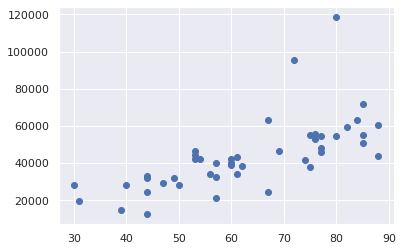

In [31]:
plt.scatter(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


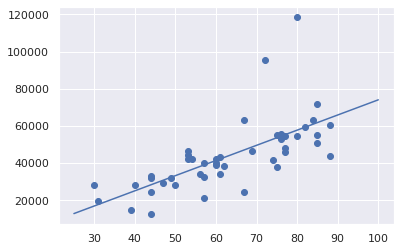

In [32]:
## fitting a best fit line
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(25, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [33]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     816.1994898019444
Model intercept: -7600.857145753223


In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


(0.0, 120000.0)

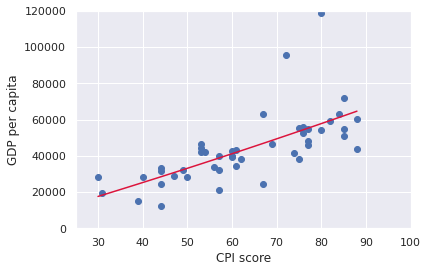

In [35]:
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])


poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 100)
yfit = poly_model.predict(xfit[:, np.newaxis])


plt.scatter(x, y)
plt.plot(xfit, yfit, color="crimson");
plt.xlabel('CPI score')
plt.ylabel('GDP per capita')
plt.xlim([25,100])
plt.ylim([0,120000])

In [36]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     816.1994898019444
Model intercept: -7600.857145753223


In [40]:
# y = 816.20x -7600.86

Calculating numbers for regression in vega

In [42]:
# when x=25, y=...
816.2*25-7600.86

12804.14

In [43]:
# when x = 95, y = ...
816.2*95-7600.86

69938.14

When x = 95, y = 69938.14; when x=25, y=12804.14